In [130]:
import pandas as pd
master_list = []
public_2022 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2022.csv')
master_list.append(public_2022)
public_2021 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2021.csv')
master_list.append(public_2021)
public_2020 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2020.csv')
master_list.append(public_2020)
public_2019 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2019.csv')
master_list.append(public_2019)
public_2018 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2018.csv')
master_list.append(public_2018)
public_2017 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2017.csv')
master_list.append(public_2017)
public_2016 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2016.csv')
master_list.append(public_2016)
public_2015 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2015.csv')
master_list.append(public_2015)
public_2014 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2014.csv')
master_list.append(public_2014)
public_2013 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2013.csv')
master_list.append(public_2013)
public_2012 = pd.read_csv('/Users/madhav/Documents/Feeders/Public/2012.csv')
master_list.append(public_2012)




In [131]:

#function to clean data where data is a dataframe
def clean(data):
    data = data.rename(columns={'County/State/ Territory': 'County', "Count": 'Status', "uad_uc_ethn_7_cat": 'Ethnicity', "Pivot Field Values": 'Total'})
    data = data[data['Status'] == 'Enr']
    data = data[data['Ethnicity'] == "All"]   
    data = data.iloc[:,[1,2,3,6]]
    data = data.sort_values(by=['Total'], ascending=False)
    return data

In [132]:
#function to assign years to each dataframe
def years(list):
    for i in range(0,len(list)):
        list[i] = clean(list[i])
        list[i]['Year'] = 2022 - i
    
    return list   

In [133]:
#Putting it all together
master_list = years(master_list)
master_df = pd.concat(master_list)


In [134]:
dv = master_df[master_df["School"] == "DOUGHERTY VALLEY HIGH SCHOOL"]
dv = dv.sort_values(by=['Year'], ascending=False)
dv.head(11)

,School,City,County,Total,Year
1392,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,39,2022
1374,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,28,2021
1318,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,34,2020
1425,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,13,2019
1448,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,25,2018
1342,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,20,2017
1344,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,13,2016
1253,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,9,2015
1337,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,14,2014
1262,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,18,2013


In [135]:
master_df.head(20)

,School,City,County,Total,Year
3087,LOWELL HIGH SCHOOL,San Francisco,San Francisco,41,2022
3105,LYNBROOK HIGH SCHOOL,San Jose,Santa Clara,39,2022
1392,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,39,2022
1239,CUPERTINO HIGH SCHOOL,Cupertino,Santa Clara,28,2022
334,ARCADIA HIGH SCHOOL,Arcadia,Los Angeles,28,2022
3336,MISSION SAN JOSE HIGH SCHOOL,Fremont,Alameda,28,2022
752,CANYON CREST ACADEMY,San Diego,San Diego,27,2022
2869,LELAND HIGH SCHOOL,San Jose,Santa Clara,26,2022
3497,MOUNTAIN VIEW HIGH SCHOOL,Mountain View,Santa Clara,24,2022
5379,TORREY PINES HIGH SCHOOL,San Diego,San Diego,22,2022


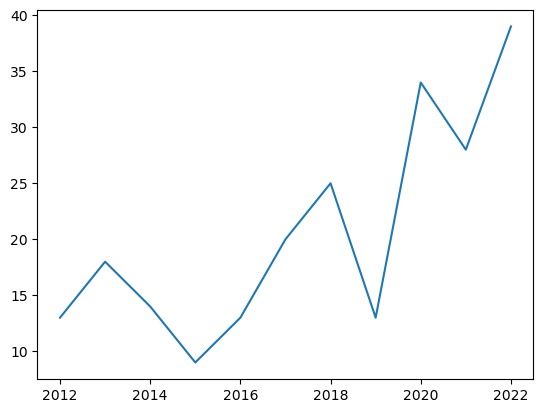

In [136]:
import matplotlib.pyplot as plt

plt.plot(dv["Year"], dv["Total"])
plt.show()


In [137]:
#Grouping Bay Area vs SoCal
bay_area = ["Alameda","Napa","Santa Clara", "Contra Costa", "San Francisco", "Solano","Marin","San Mateo","Sonoma"]
socal = ["Imperial", "Kern","Los Angeles","Orange","Riverside","San Bernardino","San Diego","Santa Barbara","San Luis Obispo","Ventura"]
ucsb_county = master_df.iloc[:,[2,3,4]]
ucsb_county = ucsb_county.groupby(['County', 'Year']).sum().reset_index()


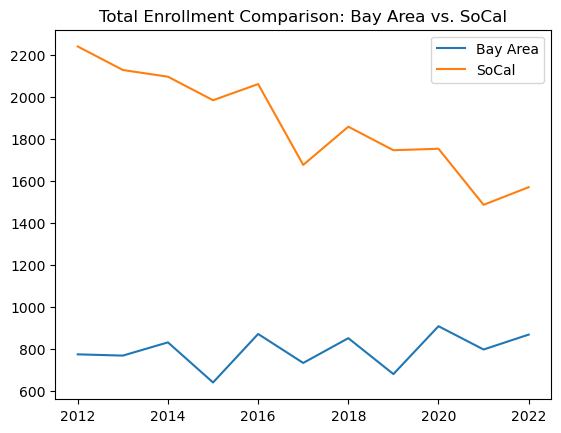

In [138]:
#making a bay area df
bay_area_df = ucsb_county[ucsb_county['County'].isin(bay_area)].groupby('Year')['Total'].sum().reset_index()

#socal df
socal_df = ucsb_county[ucsb_county['County'].isin(socal)].groupby('Year')['Total'].sum().reset_index()

plt.plot(bay_area_df["Year"], bay_area_df["Total"], label="Bay Area")
plt.plot(socal_df["Year"], socal_df["Total"], label="SoCal")
plt.title("Total Enrollment Comparison: Bay Area vs. SoCal")
plt.legend()
plt.show()

In [178]:
#Top Counties for Public
ucsb_viz_county = master_list[0]
ucsb_viz_county = ucsb_viz_county.iloc[:,[2,3]]
ucsb_viz_county = ucsb_viz_county.groupby(['County']).sum()
#ucsb_viz_county.to_csv("/Users/madhav/Downloads/ucsb_enr_by_county.csv")
ucsb_viz_county.sort_values(by='Total', ascending=False)

,Total
County,
Los Angeles,585
San Diego,303
Santa Clara,295
Orange,258
Alameda,200
Contra Costa,156
Riverside,120
San Bernardino,97
Ventura,82


In [140]:
#Private feeders
private = pd.read_csv('/Users/madhav/Documents/Feeders/Private/private.csv')
private

,Calculation1,School,City,County/State/ Territory,Count,uad_uc_ethn_7_cat,Pivot Field Values
0,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,Adm,White,8
1,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,App,White,26
2,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,Adm,Hispanic/ Latinx,4
3,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,App,Hispanic/ Latinx,34
4,ACADEMY OUR LADY OF PEACE52820,ACADEMY OUR LADY OF PEACE,San Diego,San Diego,Enr,All,3
...,...,...,...,...,...,...,...
858,YORK SCHOOL52053,YORK SCHOOL,Monterey,Monterey,Adm,Int'l,4
859,YORK SCHOOL52053,YORK SCHOOL,Monterey,Monterey,App,Int'l,11
860,YORK SCHOOL52053,YORK SCHOOL,Monterey,Monterey,App,Asian,5
861,YORK SCHOOL52053,YORK SCHOOL,Monterey,Monterey,Adm,All,5


In [141]:
def clean1(data):
    data = data.rename(columns={'County/State/ Territory': 'County', "Count": 'Status', "uad_uc_ethn_7_cat": 'Ethnicity', "Pivot Field Values": 'Total'})
    data = data[data['Ethnicity'] == "All"]   
    return data

In [142]:
def ar(data, data2):
    rates = []
    for _, row in data.iterrows():
        try:
            a = (data2[(data2['School'] == row['School']) & (data2['Status'] == 'App') & (data2['City'] == row['City'])])
            a1 = a['Total']
            b = (data2[(data2['School'] == row['School']) & (data2['Status'] == 'Adm') & (data2['City'] == row['City'])])
            b1 = b['Total']
            rates.append(round(b1.item() / a1.item(), 2))     
        except:
            print(row['School']) 
    
    data['Acceptance Rate'] = rates    
    return data    

In [143]:
clean_private = clean(private)
new_private = ar(clean_private, clean1(private))
new_private

,School,City,County,Total,Acceptance Rate
28,ARCHBISHOP MITTY HIGH SCHOOL,San Jose,Santa Clara,16,0.32
60,BASIS INDEPENDENT SILICON VLY,San Jose,Santa Clara,10,0.63
118,BISHOP ODOWD HIGH SCHOOL,Oakland,Alameda,10,0.18
628,SAGE HILL SCHOOL,Newport Coast,Orange,9,0.55
465,MATER DEI HIGH SCHOOL,Santa Ana,Orange,8,0.16
390,LOYOLA HIGH SCHOOL,Los Angeles,Los Angeles,8,0.21
659,SAINT FRANCIS HIGH SCHOOL,Sacramento,Sacramento,7,0.14
674,SAINT IGNATIUS COLLEGE PREP SC,San Francisco,San Francisco,7,0.14
70,BELLARMINE COLLEGE PREPARATORY,San Jose,Santa Clara,6,0.23
278,HARKER SCHOOL,San Jose,Santa Clara,6,0.44


In [161]:
#Top Counties for Private
import numpy as np
private_pivot = new_private.pivot_table(values= ['Total', 'Acceptance Rate'], index = ['County'], aggfunc= {'Total': [np.sum], 'Acceptance Rate' : [np.mean]})
display(private_pivot)

,Acceptance Rate,Total
,mean,sum
County,,
Alameda,0.180000,10
Contra Costa,0.150000,3
Los Angeles,0.205714,27
Monterey,0.230000,3
Napa,0.260000,3
Orange,0.226667,32
Riverside,0.130000,3
Sacramento,0.180000,11


In [144]:
#OOS Feeders
oos = pd.read_csv('/Users/madhav/Documents/Feeders/Private/oos.csv')
oos

,Calculation1,School,City,County/State/ Territory,Count,uad_uc_ethn_7_cat,Pivot Field Values
0,A J DIMOND HIGH SCHOOL20003,A J DIMOND HIGH SCHOOL,Anchorage,AK,Adm,All,4
1,A J DIMOND HIGH SCHOOL20003,A J DIMOND HIGH SCHOOL,Anchorage,AK,App,All,5
2,ADLAI E STEVENSON HIGH SCHOOL143550,ADLAI E STEVENSON HIGH SCHOOL,Lincolnshire,IL,App,Domestic Unknown,6
3,ADLAI E STEVENSON HIGH SCHOOL143550,ADLAI E STEVENSON HIGH SCHOOL,Lincolnshire,IL,Adm,White,4
4,ADLAI E STEVENSON HIGH SCHOOL143550,ADLAI E STEVENSON HIGH SCHOOL,Lincolnshire,IL,App,White,14
...,...,...,...,...,...,...,...
1062,YORK COMMUNITY HIGH SCHOOL141805,YORK COMMUNITY HIGH SCHOOL,Elmhurst,IL,App,All,9
1063,YORKTOWN HIGH SCHOOL470130,YORKTOWN HIGH SCHOOL,Arlington,VA,Adm,White,4
1064,YORKTOWN HIGH SCHOOL470130,YORKTOWN HIGH SCHOOL,Arlington,VA,App,White,10
1065,YORKTOWN HIGH SCHOOL470130,YORKTOWN HIGH SCHOOL,Arlington,VA,Adm,All,8


In [145]:
new_oos = ar(clean(oos), clean1(oos))
new_oos

,School,City,County,Total,Acceptance Rate
8,ADLAI E STEVENSON HIGH SCHOOL,Lincolnshire,IL,5,0.32
651,MERCER ISLAND HIGH SCHOOL,Mercer Island,WA,5,0.23
619,LOS ALAMOS HIGH SCHOOL,Los Alamos,NM,5,0.50
70,BELLEVUE SENIOR HIGH SCHOOL,Bellevue,WA,5,0.33
324,GARFIELD HIGH SCHOOL,Seattle,WA,5,0.40
289,FAIRVIEW HIGH SCHOOL,Boulder,CO,4,0.24
18,ALBEMARLE HIGH SCHOOL,Charlottesville,VA,4,0.64
461,ISSAQUAH HIGH SCHOOL,Issaquah,WA,4,0.29
1042,WINSTON CHURCHILL HIGH SCHOOL,Potomac,MD,4,0.60
237,EAST HIGH SCHOOL,Denver,CO,3,0.36


In [164]:
#Top States
oos_pivot = new_oos.pivot_table(values= ['Total', 'Acceptance Rate'], index = ['County'], aggfunc= {'Total': [np.sum], 'Acceptance Rate' : [np.mean]})
display(oos_pivot)

,Acceptance Rate,Total
,mean,sum
County,,
AK,0.8000,3
CO,0.3600,13
CT,0.4700,3
FL,0.2500,3
HI,0.5000,3
IL,0.3200,5
LA,0.4600,3
MD,0.4950,7


In [146]:
#Global Feeders
glo = pd.read_csv('/Users/madhav/Documents/Feeders/Private/global.csv')
glo

,Calculation1,School,City,County/State/ Territory,Count,uad_uc_ethn_7_cat,Pivot Field Values
0,21ST CENTURY EXPERIMENTAL SCH694223,21ST CENTURY EXPERIMENTAL SCH,NaN,"CHINA, PEOPLES REPUBLIC",Adm,All,23
1,21ST CENTURY EXPERIMENTAL SCH694223,21ST CENTURY EXPERIMENTAL SCH,NaN,"CHINA, PEOPLES REPUBLIC",App,All,103
2,AFFILIATED HS HANGZHOU NORMAL694491,AFFILIATED HS HANGZHOU NORMAL,NaN,"CHINA, PEOPLES REPUBLIC",Adm,All,3
3,AFFILIATED HS HANGZHOU NORMAL694491,AFFILIATED HS HANGZHOU NORMAL,NaN,"CHINA, PEOPLES REPUBLIC",App,All,26
4,AFFILIATED HS S CHINA NORMAL694293,AFFILIATED HS S CHINA NORMAL,NaN,"CHINA, PEOPLES REPUBLIC",Adm,Int'l,34
...,...,...,...,...,...,...,...
550,ZHENGZHOU FOREIGN LANGUAGE SCH694361,ZHENGZHOU FOREIGN LANGUAGE SCH,NaN,"CHINA, PEOPLES REPUBLIC",App,All,44
551,ZHIXIN HIGH SCHOOL694022,ZHIXIN HIGH SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",Adm,Int'l,5
552,ZHIXIN HIGH SCHOOL694022,ZHIXIN HIGH SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",App,Int'l,21
553,ZHIXIN HIGH SCHOOL694022,ZHIXIN HIGH SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",Adm,All,6


In [148]:
#modified for international
def ag(data, data2):
    rates = []
    for _, row in data.iterrows():
        try:
            a = (data2[(data2['School'] == row['School']) & (data2['Status'] == 'App')])
            a1 = a['Total']
            b = (data2[(data2['School'] == row['School']) & (data2['Status'] == 'Adm')])
            b1 = b['Total']
            rates.append(round(b1.item() / a1.item(), 2))     
        except:
            print(row['School']) 
    
    data['Acceptance Rate'] = rates    
    return data

In [149]:
new_glo = ag(clean(glo), clean1(glo))
new_glo

,School,City,County,Total,Acceptance Rate
41,BEIJING NATIONAL DAY SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",15,0.24
516,WUHAN BRITAIN-CHINA SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",12,0.37
141,GUANGZHOU FOREIGN LANGUAGE SCH,NaN,"CHINA, PEOPLES REPUBLIC",11,0.46
246,NANJING JINLING HS HEXI CAMPUS,NaN,"CHINA, PEOPLES REPUBLIC",9,0.29
64,CAMFORD ROYAL SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",9,0.61
153,HEFEI NO 1 HIGH SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",9,0.33
350,SHANDONG EXPERIMENTAL HIGH SCH,NaN,"CHINA, PEOPLES REPUBLIC",8,0.54
51,BEIJING NO 101 HIGH SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",8,0.39
501,UNITED KINGDOM,NaN,UNITED KINGDOM,8,0.37
156,HEFEI NO 8 HIGH SCHOOL,NaN,"CHINA, PEOPLES REPUBLIC",8,0.42


In [165]:
#global feeders
global_pivot = new_glo.pivot_table(values= ['Total', 'Acceptance Rate'], index = ['County'], aggfunc= {'Total': [np.sum], 'Acceptance Rate' : [np.mean]})
display(global_pivot)

,Acceptance Rate,Total
,mean,sum
County,,
CANADA,0.600000,3
"CHINA, PEOPLES REPUBLIC",0.302955,249
"KOREA, REPUBLIC OF (SOUTH)",0.415000,7
PAKISTAN,0.460000,3
RUSSIA,0.630000,4
SINGAPORE,0.300000,5
UNITED KINGDOM,0.370000,8
Unknown,0.160000,3


In [191]:
#adding percentages to the public df
new_public = ar(clean(public_2022), clean1(public_2022))
new_public[new_public['County'] == 'San Joaquin']

,School,City,County,Total,Acceptance Rate
2928,LINCOLN HIGH SCHOOL,Stockton,San Joaquin,9,0.41
465,BEAR CREEK HIGH SCHOOL,Stockton,San Joaquin,7,0.88
2973,LODI HIGH SCHOOL,Lodi,San Joaquin,6,0.52
2827,LATHROP HIGH SCHOOL,Lathrop,San Joaquin,6,0.53
3480,MOUNTAIN HOUSE HIGH SCHOOL,Mountain House,San Joaquin,6,0.11
3231,MERRILL F WEST HIGH SCHOOL,Tracy,San Joaquin,5,0.65
5024,SIERRA HIGH SCHOOL,Manteca,San Joaquin,4,0.40
5626,VENTURE ACADEMY,Stockton,San Joaquin,4,1.00
5396,TRACY JOINT UNION HIGH SCHOOL,Tracy,San Joaquin,3,0.41
1467,EAST UNION HIGH SCHOOL,Manteca,San Joaquin,3,0.57


In [180]:
public_pivot = new_public.pivot_table(values= ['Total', 'Acceptance Rate'], index = ['County'], aggfunc= {'Total': [np.sum], 'Acceptance Rate' : [np.mean]})
display(public_pivot)

,Acceptance Rate,Total
,mean,sum
County,,
Alameda,0.280800,200
Butte,0.330000,10
Contra Costa,0.331053,156
El Dorado,0.303333,19
Fresno,0.477000,47
Humboldt,0.495000,8
Imperial,0.900000,9
Kern,0.493333,57


In [196]:
cali_2022 = pd.concat([new_public, new_private])
cali_2022 = cali_2022.sort_values(by = 'Total', ascending=False)
cali_2022.head(20)

,School,City,County,Total,Acceptance Rate
3087,LOWELL HIGH SCHOOL,San Francisco,San Francisco,41,0.38
1392,DOUGHERTY VALLEY HIGH SCHOOL,San Ramon,Contra Costa,39,0.26
3105,LYNBROOK HIGH SCHOOL,San Jose,Santa Clara,39,0.46
1239,CUPERTINO HIGH SCHOOL,Cupertino,Santa Clara,28,0.27
334,ARCADIA HIGH SCHOOL,Arcadia,Los Angeles,28,0.26
3336,MISSION SAN JOSE HIGH SCHOOL,Fremont,Alameda,28,0.26
752,CANYON CREST ACADEMY,San Diego,San Diego,27,0.33
2869,LELAND HIGH SCHOOL,San Jose,Santa Clara,26,0.32
3497,MOUNTAIN VIEW HIGH SCHOOL,Mountain View,Santa Clara,24,0.35
5379,TORREY PINES HIGH SCHOOL,San Diego,San Diego,22,0.25


In [197]:
cali_pivot = cali_2022.pivot_table(values= ['Total', 'Acceptance Rate'], index = ['County'], aggfunc= {'Total': [np.sum], 'Acceptance Rate' : [np.mean]})
display(cali_pivot)

,Acceptance Rate,Total
,mean,sum
County,,
Alameda,0.276923,210
Butte,0.330000,10
Contra Costa,0.322000,159
El Dorado,0.303333,19
Fresno,0.477000,47
Humboldt,0.495000,8
Imperial,0.900000,9
Kern,0.493333,57


In [212]:
#exporting data for visulization with datawrapper
cali_pivot_2 = cali_2022.pivot_table(values= ['Total'], index = ['County'], aggfunc= {'Total': [np.sum]})
display(cali_pivot_2)
cali_pivot_2.to_csv('/Users/madhav/Downloads/cali.csv')

,Total
,sum
County,
Alameda,210
Butte,10
Contra Costa,159
El Dorado,19
Fresno,47
Humboldt,8
Imperial,9
Kern,57


In [213]:
for data in master_list:
    print(data.head(5))

                            School           City         County  Total  Year
3087            LOWELL HIGH SCHOOL  San Francisco  San Francisco     41  2022
3105          LYNBROOK HIGH SCHOOL       San Jose    Santa Clara     39  2022
1392  DOUGHERTY VALLEY HIGH SCHOOL      San Ramon   Contra Costa     39  2022
1239         CUPERTINO HIGH SCHOOL      Cupertino    Santa Clara     28  2022
334            ARCADIA HIGH SCHOOL        Arcadia    Los Angeles     28  2022
                            School           City         County  Total  Year
2917          LYNBROOK HIGH SCHOOL       San Jose    Santa Clara     36  2021
2900            LOWELL HIGH SCHOOL  San Francisco  San Francisco     34  2021
2839         LOS ALTOS HIGH SCHOOL      Los Altos    Santa Clara     28  2021
1374  DOUGHERTY VALLEY HIGH SCHOOL      San Ramon   Contra Costa     28  2021
3194       MONTA VISTA HIGH SCHOOL      Cupertino    Santa Clara     26  2021
                            School                 City        C